In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("/Users/hollyyoon/Downloads/online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#파생변수 만들기 - 판매액
df["TotalPrice"] = df['Quantity'] * df['UnitPrice']

In [6]:
#파생변수 만들기 - 취소여부
df['Cancel'] = df['Quantity']<0

In [8]:
#날짜 변환
df["InvoiceDate"] = pd.to_datetime(df['InvoiceDate'])

In [10]:
#파생변수 만들기 - 날짜
df["InvoiceYear"] = df['InvoiceDate'].dt.year
df["InvoiceMonth"] = df['InvoiceDate'].dt.month
df["InvoiceDay"] = df['InvoiceDate'].dt.day
df["InvoiceDow"] = df['InvoiceDate'].dt.dayofweek
df["InvoiceYM"] = df['InvoiceDate'].astype(str).str[:7]

array([[<AxesSubplot:title={'center':'Quantity'}>,
        <AxesSubplot:title={'center':'InvoiceDate'}>,
        <AxesSubplot:title={'center':'UnitPrice'}>],
       [<AxesSubplot:title={'center':'CustomerID'}>,
        <AxesSubplot:title={'center':'TotalPrice'}>,
        <AxesSubplot:title={'center':'InvoiceYear'}>],
       [<AxesSubplot:title={'center':'InvoiceMonth'}>,
        <AxesSubplot:title={'center':'InvoiceDay'}>,
        <AxesSubplot:title={'center':'InvoiceDow'}>]], dtype=object)

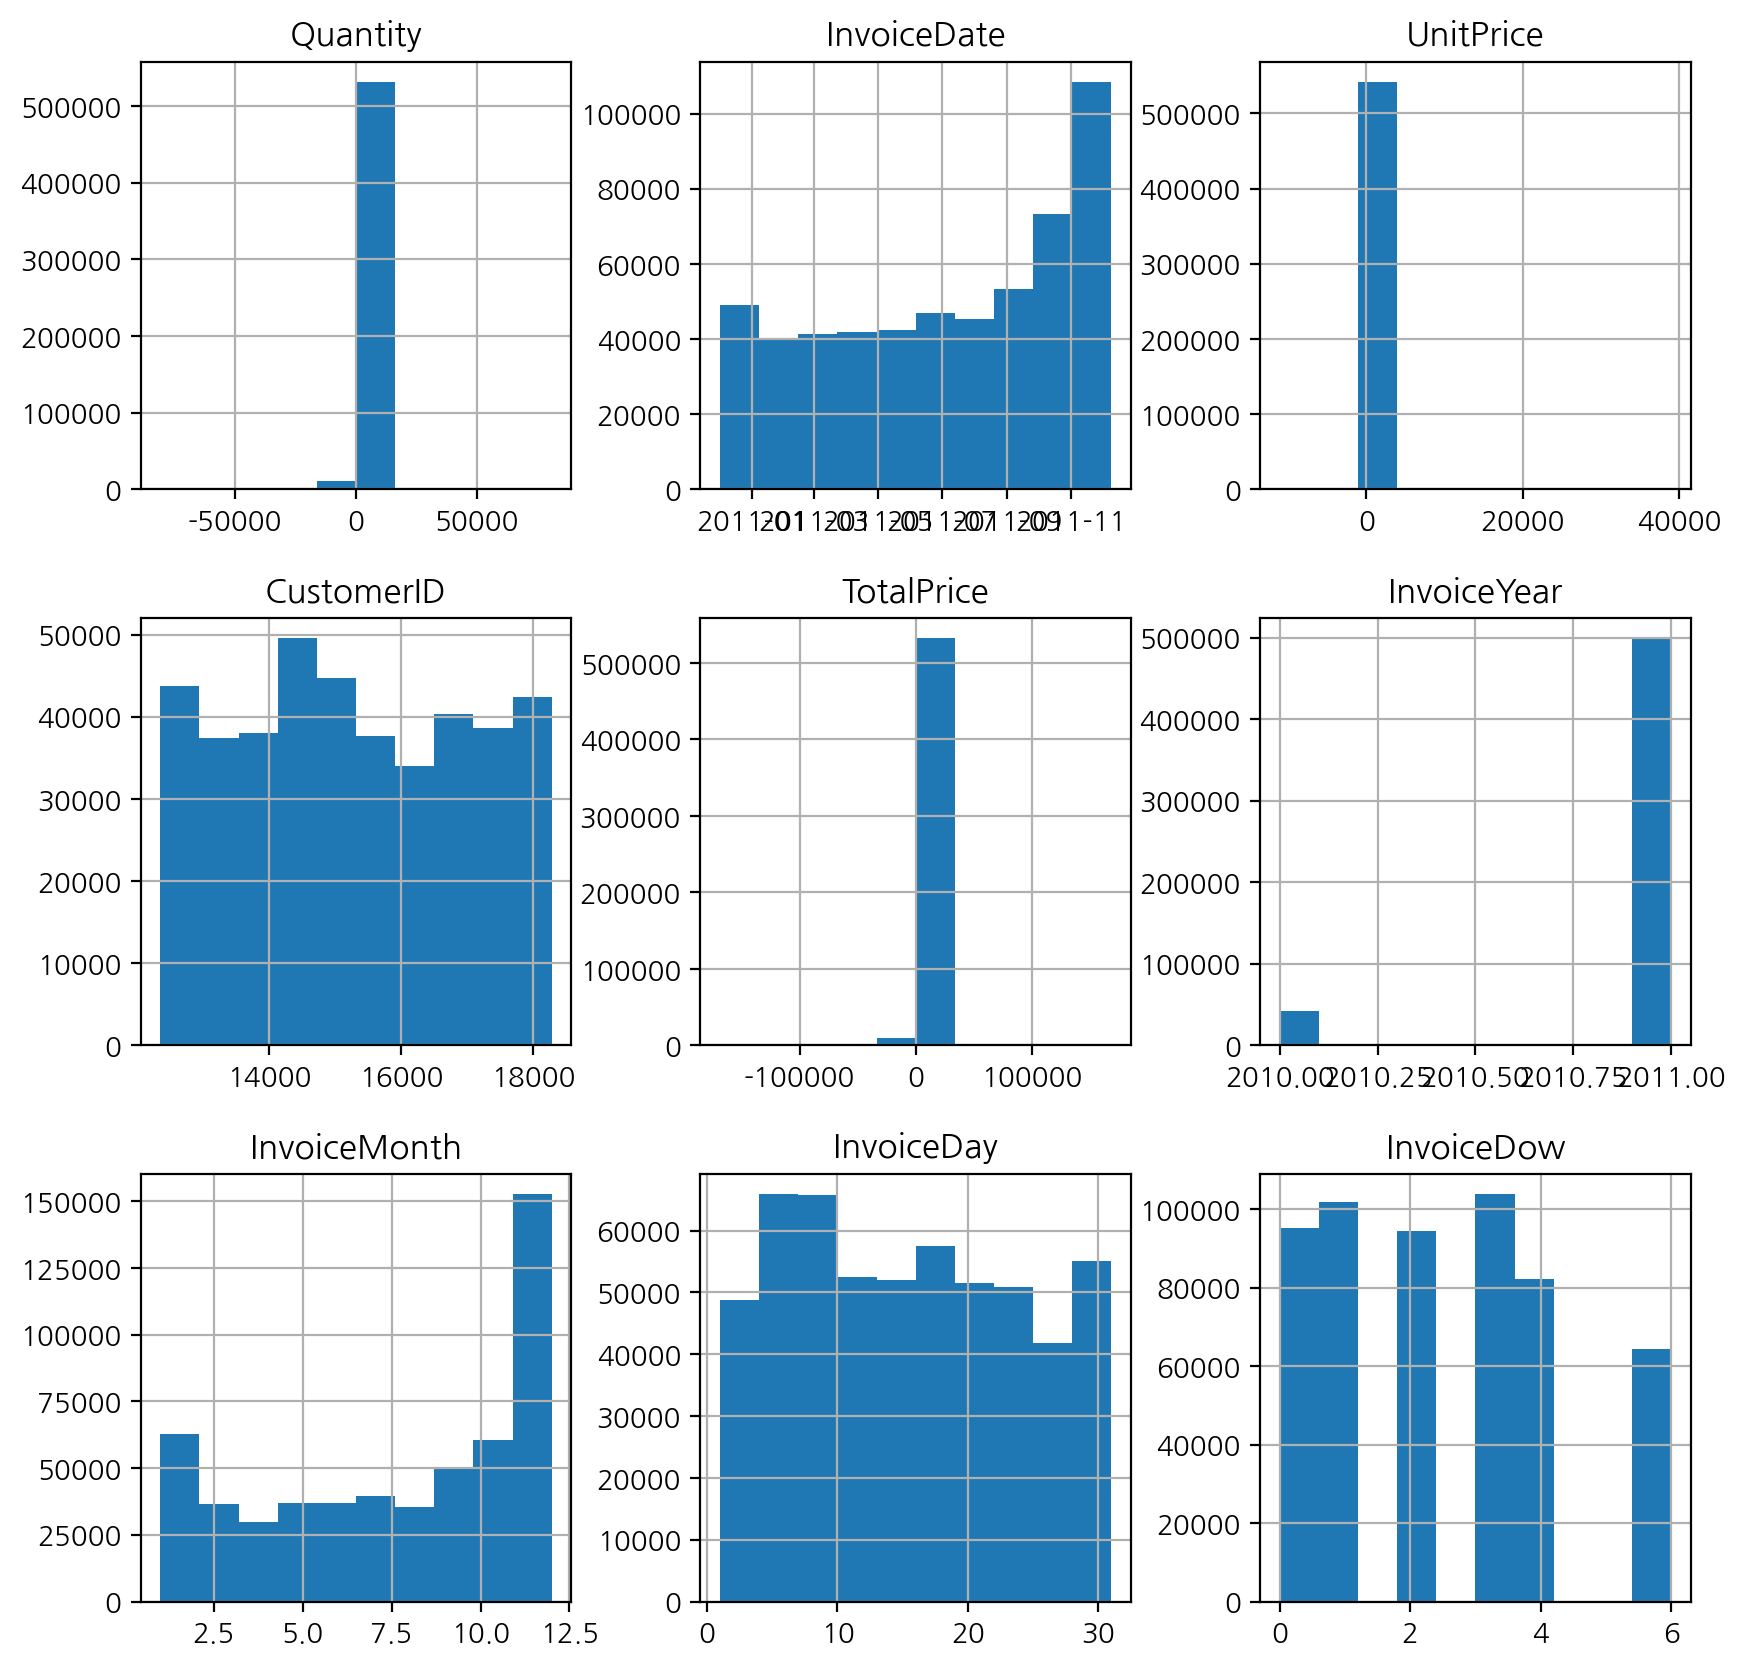

In [11]:
df.hist(figsize=(10,10))

## ID가 없는 고객 제외

In [12]:
df_valid = df[df['CustomerID'].notnull() & (df['Quantity']>0) & df['UnitPrice']>0].copy()
df_valid = df_valid.drop_duplicates().copy()
df_valid.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,2010,12,1,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,2010,12,1,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,2010,12,1,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,2010,12,1,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,2010,12,1,2,2010-12


## MAU

In [13]:
df_valid.groupby('InvoiceYM').agg({'CustomerID':'nunique'})

,CustomerID
InvoiceYM,
2010-12,885
2011-01,741
2011-02,758
2011-03,974
2011-04,856
2011-05,1056
2011-06,991
2011-07,949
2011-08,935


## 월단위

In [14]:
#파생변수 만들기 
df_valid['InvoiceDate1'] = pd.to_datetime(df_valid['InvoiceYM'])
df_valid['InvoiceDateMin'] = df_valid.groupby('CustomerID')['InvoiceDate1'].transform('min')
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Cancel,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,InvoiceYM,InvoiceDate1,InvoiceDateMin
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,False,2010,12,1,2,2010-12,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,2010,12,1,2,2010-12,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,False,2010,12,1,2,2010-12,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,2010,12,1,2,2010-12,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,False,2010,12,1,2,2010-12,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,False,2011,12,9,4,2011-12,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,False,2011,12,9,4,2011-12,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,2011,12,9,4,2011-12,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,False,2011,12,9,4,2011-12,2011-12-01,2011-08-01


In [16]:
year_diff = df_valid['InvoiceDate'].dt.year - df_valid['InvoiceDateMin'].dt.year
month_diff = df_valid['InvoiceDate'].dt.month - df_valid['InvoiceDateMin'].dt.month

In [17]:
#코호트 월별 빈도수
df_valid['CohortIndex'] = year_diff*12 + month_diff + 1
df_valid['CohortIndex'].value_counts()

1     116857
2      27516
4      26993
3      26727
6      26673
5      25165
7      23462
8      23298
12     23011
10     22968
9      22751
11     20098
13      7173
Name: CohortIndex, dtype: int64

<AxesSubplot:xlabel='CohortIndex', ylabel='count'>

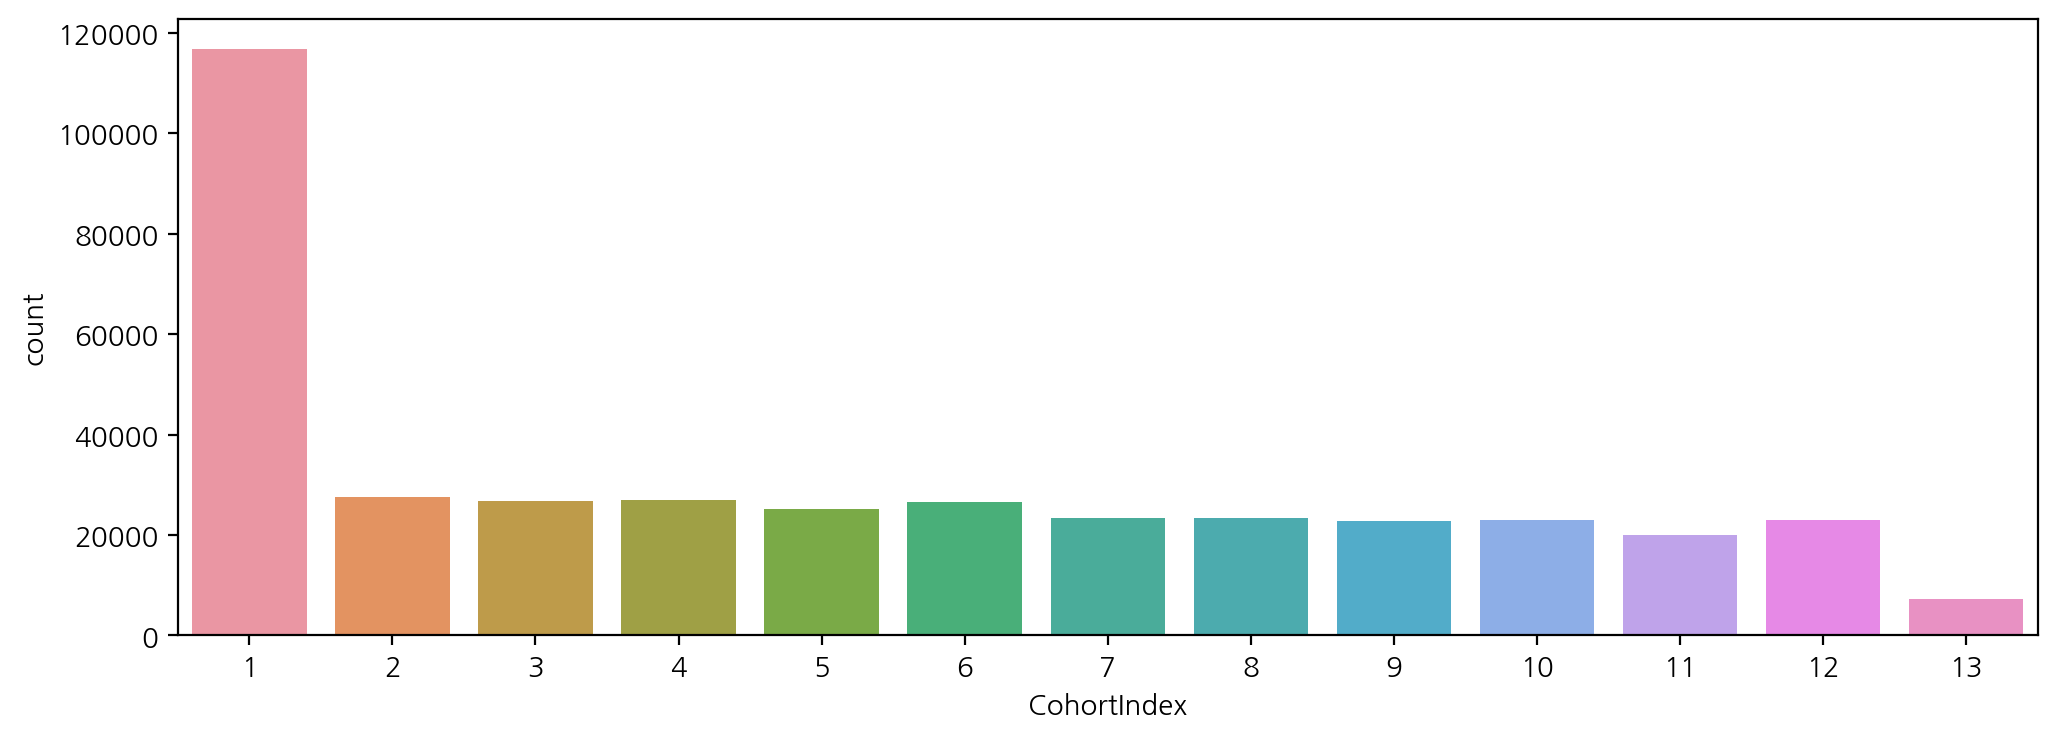

In [19]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df_valid, x='CohortIndex')

## 잔존 빈도/잔존율

In [20]:
cohort_count = df_valid.groupby(['InvoiceDateMin','CohortIndex'])['CustomerID'].nunique().unstack()
cohort_count

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
InvoiceDateMin,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

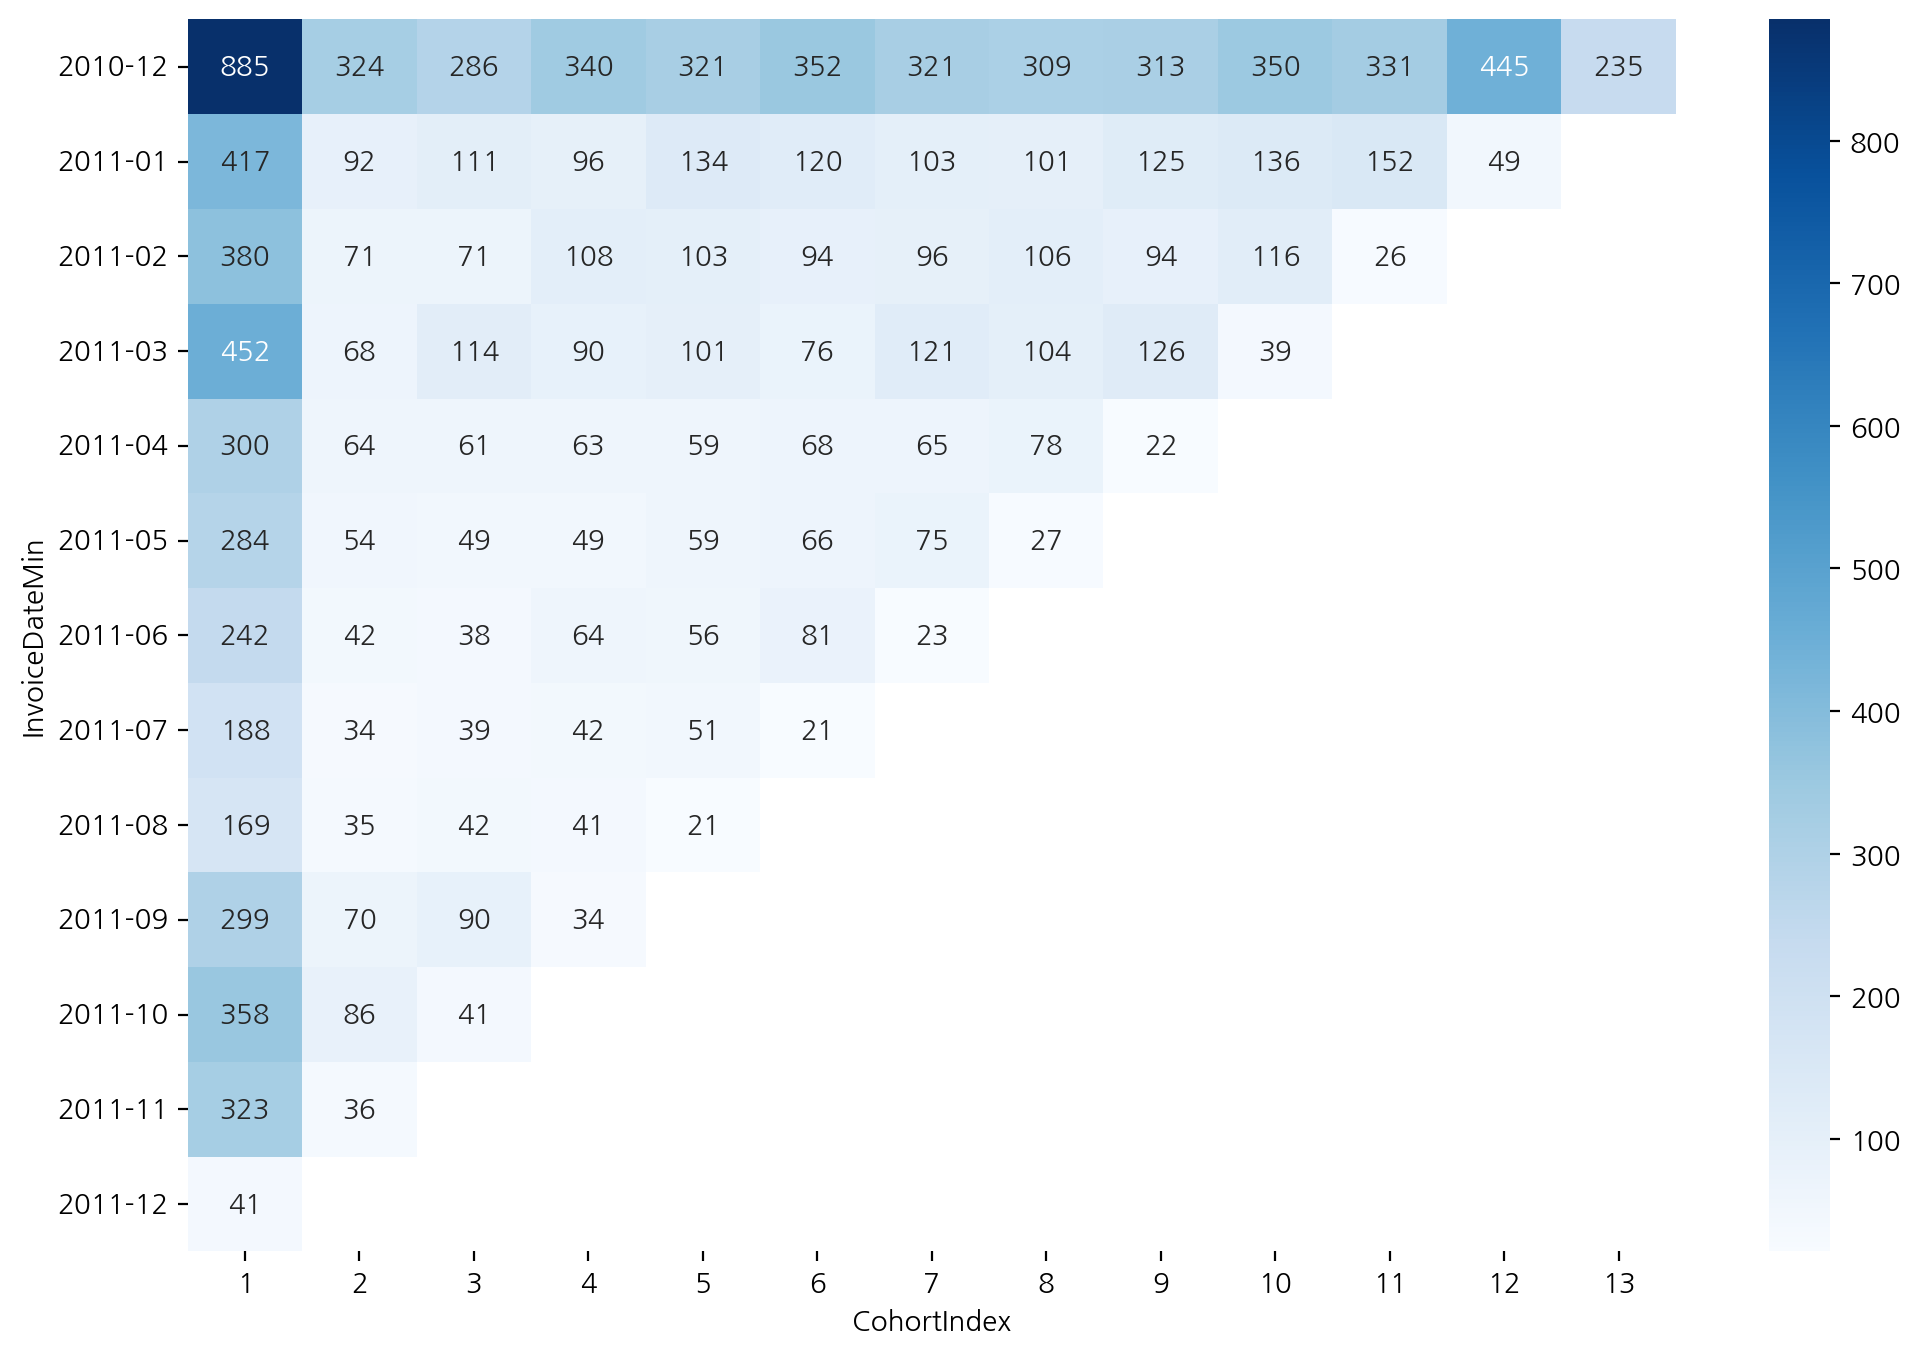

In [21]:
cohort_count.index=cohort_count.index.astype(str).str[:7]
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_count, cmap='Blues', annot=True, fmt='.0f')

<AxesSubplot:xlabel='InvoiceDateMin'>

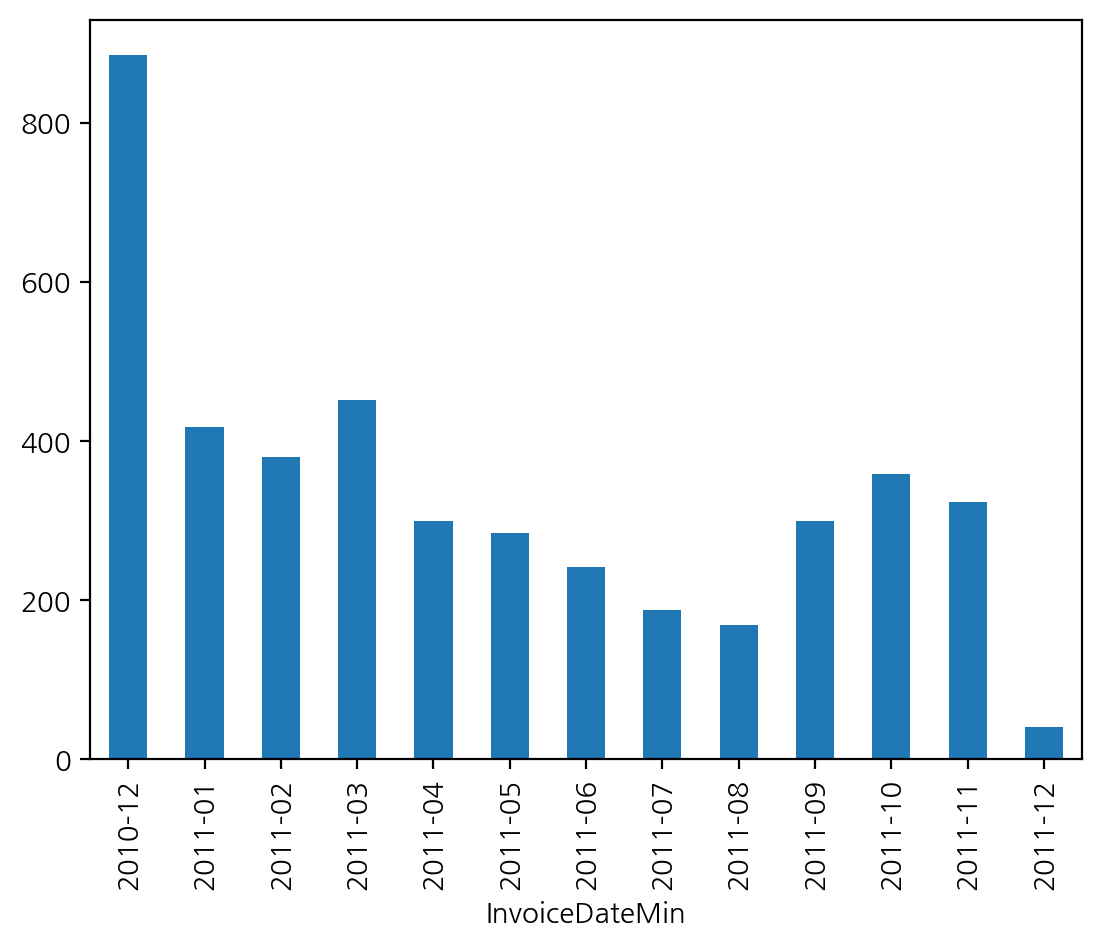

In [23]:
#월별 신규고객 유입수
cohort_count[1].plot.bar()

<AxesSubplot:xlabel='CohortIndex', ylabel='InvoiceDateMin'>

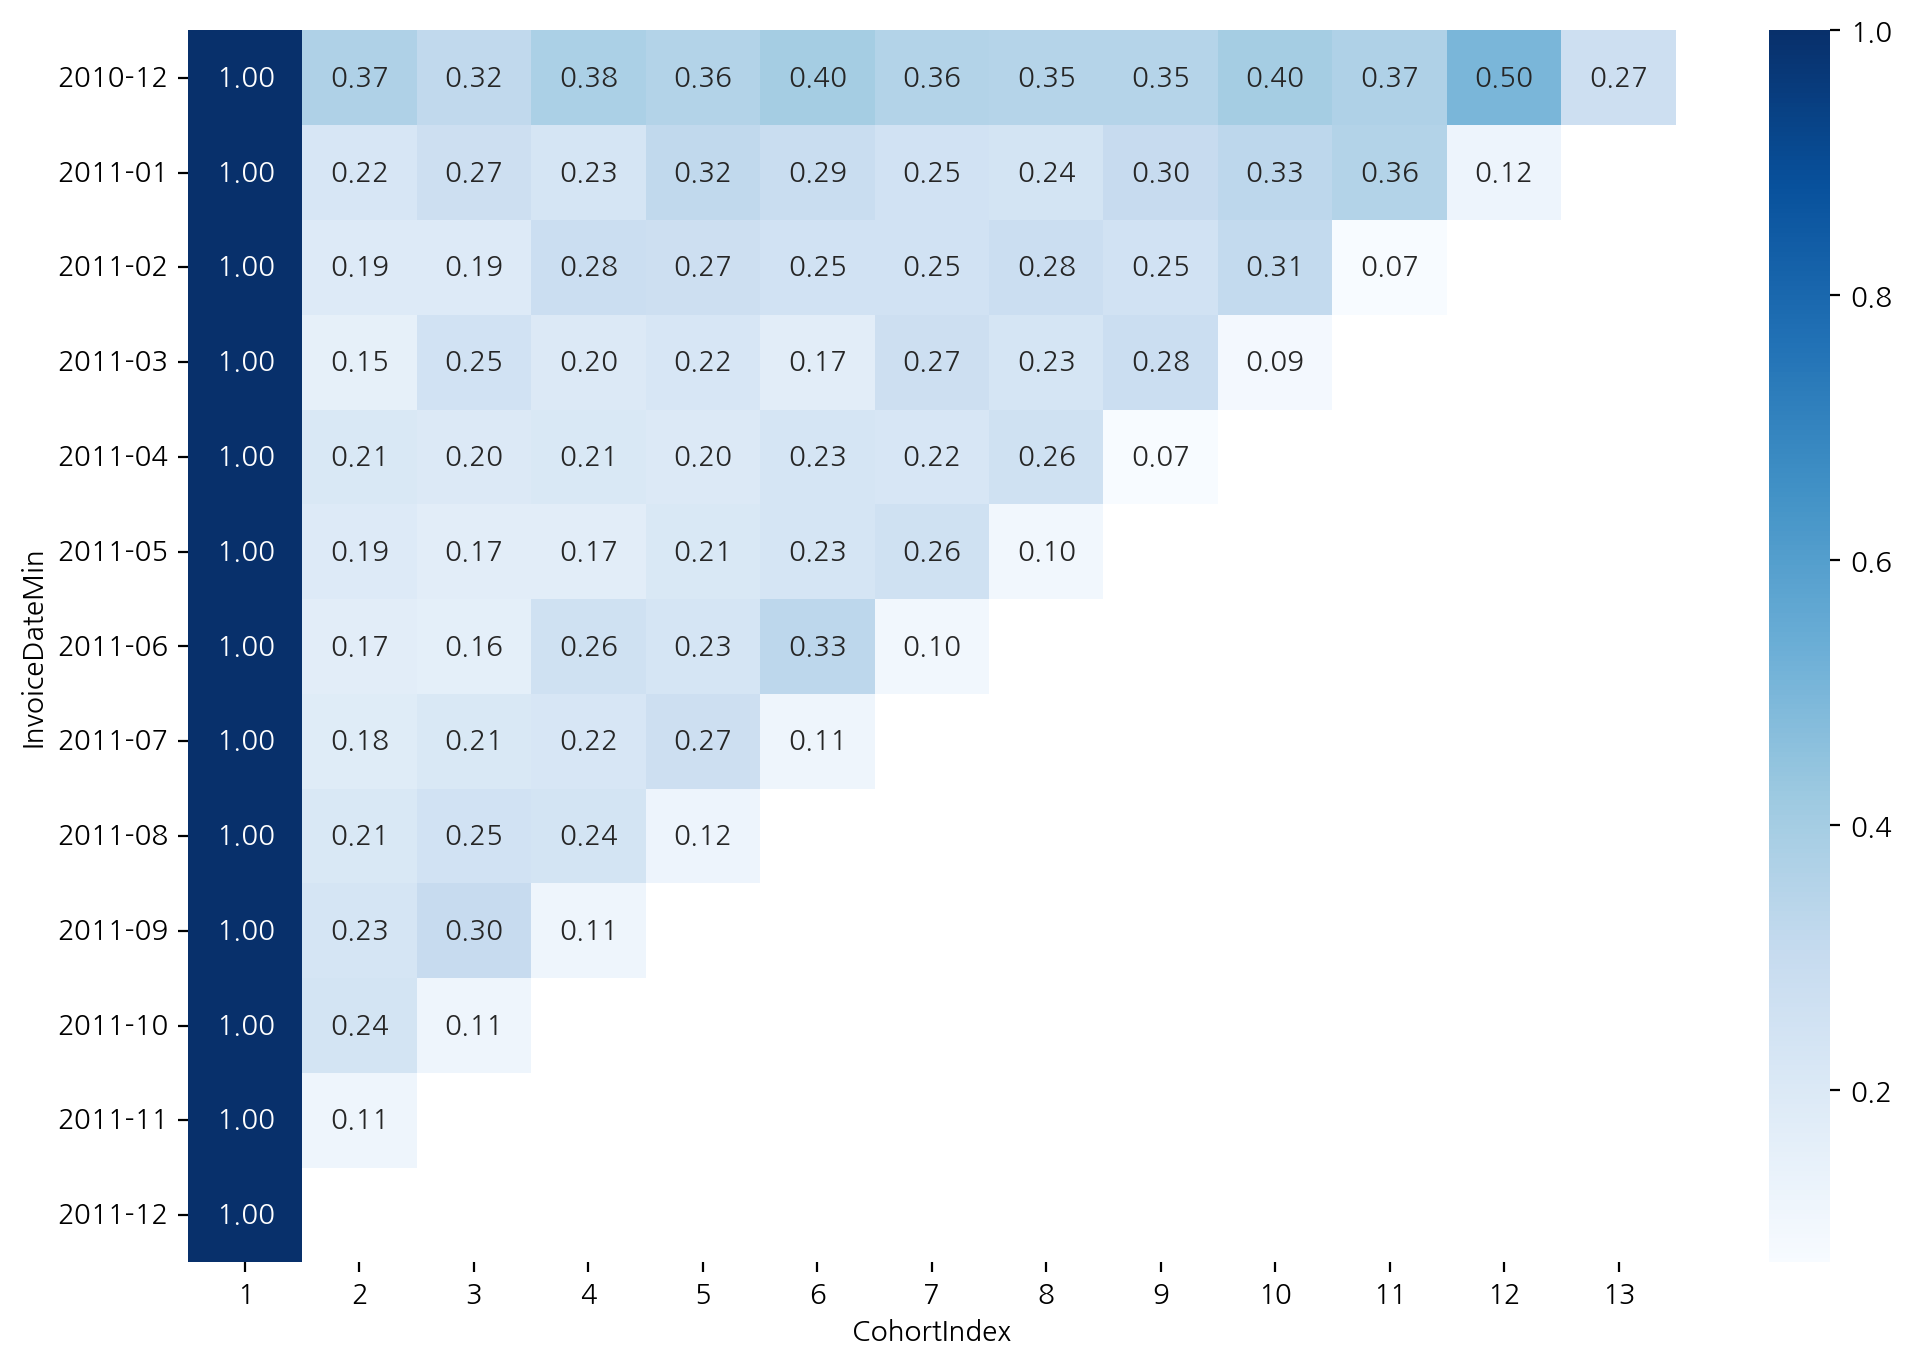

In [26]:
cohort_num = cohort_count.div(cohort_count[1], axis=0).round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_num, cmap='Blues', annot=True, fmt='.2f')